### Import Modules

In [4]:
import os
import subprocess
import numpy as np
import nibabel as nib
from nilearn import plotting
import pandas
from surfer import Brain
from nipy import algorithms
from nipype.interfaces.fsl import WarpPointsToStd

ImportError: No module named nipype.interfaces.fsl

### Set up files paths

* Parcellation

In [3]:
schaefer_path = '/Users/hxia/Desktop/BBL/data/joy/BBL/studies/pnc/template/Schaefer/MNI'
parcel_filename = os.path.join(schaefer_path, 'Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz')
community_filename = os.path.join(schaefer_path,'Schaefer2018_100Parcels_7Networks_order.txt')

* Genes

In [26]:
ABI_path = '/Users/hxia/Google Drive/GraduateSchool/Courses/BE566/Project1/ABI/'
donor='10021'
gene_filename = os.path.join(ABI_path,'normalized_microarray_donor'+donor,'SampleAnnot.csv')

### Load files
* Parcellation

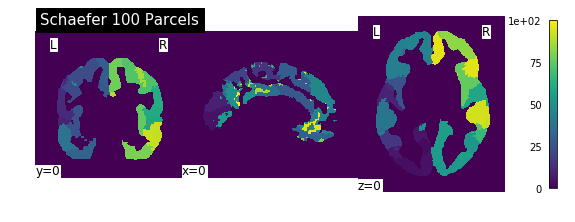

In [4]:
img = nib.load(parcel_filename)
plotting.plot_img(img,draw_cross=False,cut_coords=(0,0,0),title='Schaefer 100 Parcels',colorbar=True)

In [5]:
image = img.get_data()

In [18]:
parcel_filename_chead = '/data/joy/BBL/studies/pnc/template/Schaefer/MNI/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz'

In [19]:
parcel_filename

'/Users/hxia/Desktop/BBL/data/joy/BBL/studies/pnc/template/Schaefer/MNI/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz'

In [44]:
gene_mni_coord

,mni_x,mni_y,mni_z
0,-29.2,5.8,-2.6
1,-10.1,5.9,-8.4
2,8.9,8.5,-7.4
3,7.9,0.8,-6.7
4,16.9,0.9,-9.1
5,37.0,-0.5,4.1
6,13.4,2.2,0.2
7,24.8,1.7,-22.1
8,19.2,0.7,-14.9
9,18.1,1.6,-22.1


In [83]:
vox_coord = pandas.DataFrame(np.zeros(gene_mni_coord.shape))

In [74]:
for idx, string in enumerate(foo_str_list):
    foo_str_float = float(string)
    print(idx,foo_str_float)

(0, 119.2)
(1, 131.8)
(2, 69.4)


In [85]:
for ridx, row in gene_mni_coord.iterrows():
    coord_cmd = "echo %f %f %f|std2imgcoord -img %s -std %s -vox " % (row[0],row[1],row[2],parcel_filename,parcel_filename)
    vox_coord_str = subprocess.check_output(coord_cmd, shell = True)
    vox_coord_str_list = vox_coord_str.split()
    for cidx, coord in enumerate(vox_coord_str_list): 
        vox_coord_float = float(coord)
        vox_coord.iloc[ridx][cidx] = vox_coord_float

In [86]:
vox_coord

,0,1,2
0,119.2,131.8,69.4
1,100.1,131.9,63.6
2,81.1,134.5,64.6
3,82.1,126.8,65.3
4,73.1,126.9,62.9
5,53.0,125.5,76.1
6,76.6,128.2,72.2
7,65.2,127.7,49.9
8,70.8,126.7,57.1
9,71.9,127.6,49.9


In [81]:
vox_coord.shape

(0, 0)

In [24]:
subprocess.check_output(coord_cmd, shell = True)

'77  133  50\n'

In [71]:
image.shape

(182, 218, 182)

In [58]:
image = img.get_data()

In [59]:
np.max(image)

100.0

In [225]:
cmty = pandas.read_csv(community_filename,delim_whitespace=True,header=None)

In [263]:
cmty_1 = np.where(image_data <=9)

In [11]:
%gui qt4

In [56]:
brain = Brain('fsaverage', "lh",  "sphere", alpha=0.5,background='white')

In [ ]:
brain = Brain

In [49]:
brain.add_foci(gene_mni_coord,color="gold",scale_factor=0.1)

In [51]:
aparc_file = os.path.join("/Applications/freesurfer/subjects",
                          'fsaverage', "label",
                          'lh' + ".aparc.a2009s.annot")

In [326]:
labels, ctab, names = nib.freesurfer.read_annot('/Users/hxia/Desktop/BBL/data/joy/BBL/studies/pnc/template/Schaefer/FreeSurfer5.3/fsaverage/label/lh.aparc.a2005s.annot')

In [52]:
brain.add_annotation('/Users/hxia/Desktop/BBL/data/joy/BBL/studies/pnc/template/Schaefer/FreeSurfer5.3/fsaverage/label/lh.aparc.a2005s.annot',borders=False,alpha=0.5)

In [336]:
ctab.shape

(82, 5)

In [ ]:
labels, ctab, names = nib.freesurfer.read_annot

* Genes

In [27]:
gene = pandas.io.parsers.read_csv(gene_filename,delimiter=',')

In [28]:
gene_mni_coord = gene.iloc[:,-3:]

In [27]:
gene_xyz_coord = gene.iloc[:,-6:-3]

### Mapp genes to parcels

In [73]:
image_data = img.get_data()

In [18]:
M = img.affine[:3, :3] #rotation/zoom matrix
abc = img.affine[:3, 3] #translation

In [22]:
def f(i,j,k):
    return M.dot([i,j,k]) + abc

In [83]:
nib.affines.apply_affine(img.affine,[0,0,0])

array([  90., -126.,  -72.])

In [136]:
np.arange(len(gene_mni_coord)

SyntaxError: unexpected EOF while parsing (<ipython-input-136-8ac1ecb9645f>, line 1)

In [183]:
gene_Schafer_coord_cols = ['mni_x','mni_y','mni_z','new_x','new_y','new_z','community']
gene_Schafer_coord = pandas.DataFrame(0,index=np.arange(len(gene_mni_coord)),columns=gene_Schafer_coord_cols)

In [163]:
gene_Schafer_coord.iloc[index][:3] = row

In [187]:
for index, row in gene_mni_coord.iterrows():
    gene_Schafer_coord.iloc[index][0:3] = row
    gene_Schafer_coord.iloc[index][3:6] = row + (np.array(image_data.shape)-1)/2
    if gene_Schafer_coord.iloc[index][3:6]
    gene_Schafer_coord.iloc[index]['community'] = 1
    

In [40]:
gene_xyz_coord.iloc[0]

mri_voxel_x    120
mri_voxel_y     91
mri_voxel_z     71
Name: 0, dtype: int64

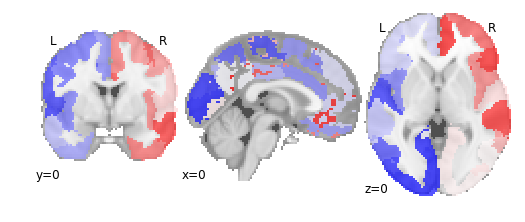

In [174]:
nilearn.plotting.plot_roi(img,cmap=plt.cm.bwr,cut_coords=(0,0,0),draw_cross=False)